In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. Cargar dataframe con el corpus

Puede hacer falta instalar *openpyxl*:

`pip3 install openpyxl`

In [3]:
df = pd.read_excel('DATA/corpus2.xlsx')

text_col_name = "TEXTO_SIN_STOPWORDS"

df.head(10)

,Unnamed: 0,Exc_register_id,Exc_patientCenter_id,Exc_texto_relleno,TEXTO_SIN_STOPWORDS,texto_tokenizado,Num_palabras,Mexico02,Mexico01,CurrentActivity,Prof,Weight,Size,FamStatus,NumberChildren,Mexico06,@1_A,@2_A,@3_A,@4_A,@5_A,Mexico10,Bariatrica02,TerMedicamentos05,Mexico11,Mexico12,Mexico18,Mexico13,PHQ01,PHQ02,PHQ03,PHQ04,PHQ05,PHQ06,PHQ07,PHQ08,PHQ09,Gad01Last2week,Gad02Last2week,Gad05Last2week,Gad07Last2week,DAST01,DAST02,DAST03,DAST04,DAST05,DAST06,DAST07,DAST08,DAST09,DAST10,@1,@2,@3,@4,@5,@6,Cannabis,ALCA01,ALCA02,ALCA03,CSSRS01,CSSRS02,CSSRS03,CSSRS04,CSSRS05,CSSRS06,CSSRS07,NSSIIS01B_Sometimes,NSSIIS01B_Last_Month_nb,T_WHODAS,T_PHQ_9,T_GAD_2,T_DAST,T_ALC,BMI
0,28,5d9f38c92fc67657d35eabf4,66846,Soy una persona hipersensible y extremadamente...,persona hipersensible extremadamente emocional...,"['persona', 'hipersensible', 'extremadamente',...",16,Si,Si,Estudiante,Empleadoa,55.7,150.0,Solteroa,0.0,1-3,NaN,NaN,NaN,NaN,NaN,NaN,No,Si,NaN,NaN,NaN,NaN,Varios días,Varios días,Varios días,Varios días,Casi todos los días,Casi todos los días,Casi todos los días,Varios días,Varios días,1.0,NaN,NaN,0.0,Si,NaN,NaN,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Menos de una vez al mes,1 ó 2,Nunca,Si,No,No,No,No,Si,No,Si,0,29.6,15.0,1.0,3.0,1.0,24.755556
1,39,5dcd652e2fc6762322259bd3,77472,no mantengo relaciones sexuales por si puse qu...,mantengo relaciones sexuales si puse si estable,"['mantengo', 'relaciones', 'sexuales', 'si', '...",7,Si,No,Estudiante,Otras personas sin actividad profesional,52.0,163.0,Pareja de hecho,NaN,1-3,Si,Si,Si,Si,Si,Inexistente,No,Si,NaN,NaN,NaN,NaN,Ningún día,Ningún día,Varios días,Más de la mitad de los días,Ningún día,Ningún día,Ningún día,Ningún día,Ningún día,2.0,NaN,NaN,0.0,No IR A DT10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No bebió durante los últimos 12 meses,1 ó 2,Nunca,No,No,No,No,No,No,NaN,No,0,30.2,3.0,2.0,NaN,0.0,19.571681
2,42,5da4ffdb2fc6763c8100aaa4,68177,Necesito dormir más Una beca para no tener que...,necesito dormir beca tener mantener tres famil...,"['necesito', 'dormir', 'beca', 'tener', 'mante...",11,Si,Si,Estudiante,Profesionista,79.0,NaN,Pareja de hecho,1.0,4-6,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,Varios días,Ningún día,Ningún día,Más de la mitad de los días,Ningún día,Ningún día,Varios días,Varios días,Ningún día,1.0,NaN,NaN,1.0,No IR A DT10,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No bebió durante los últimos 12 meses,1 ó 2,Nunca,No,No,No,No,No,No,NaN,No,0,25.6,5.0,2.0,0.0,0.0,NaN
3,57,5db21a402fc67664a12d0985,71296,yo tengo una vida digamos todo esta leve sin n...,vida digamos leve ningún tipo problema solo al...,"['vida', 'digamos', 'leve', 'ningún', 'tipo', ...",18,Si,Si,Estudiante,NaN,NaN,NaN,Solteroa,NaN,Mas de 6,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,Más de la mitad de los días,2.0,NaN,NaN,2.0,No IR A DT10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,NaN,No,0,51.4,18.0,4.0,NaN,NaN,NaN
4,58,5dcdfb2e2fc676288766f05c,78965,yo tengo un problema desde hace mucho tiempo p...,problema hace tiempo actualmente tratando tera...,"['problema', 'hace', 'tiempo', 'actualmente', ...",7,Si,Si,Estudiante,Otras personas sin actividad profesional,111.0,NaN,Solteroa,NaN,4-6,Si,No,No,No,No,Poco frecuente,No,Si,NaN,NaN,NaN,NaN,Más de la mitad de los días,Más de la mitad de los días,Varios días,Ningún día,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Más de la mitad de los días,3.0,NaN,NaN,0.0,Si,No,Si,No,No,No,No,Si,No,No,Si,No,No,No,Si,Si,No,Una vez por semana,10 o más,Una vez por semana,Si,Si,No,No,No,Si,No,Si,0,27.6,19.0,3.0,1.0,10.0,NaN
5,59,5dd562432fc67620801817f6,80409,yo sólo quiero saber por qué nos hacen tantas ..

Ver los nombres de las columnas

In [5]:
df.columns.to_list()

['Unnamed: 0',
 'Exc_register_id',
 'Exc_patientCenter_id',
 'Exc_texto_relleno',
 'TEXTO_SIN_STOPWORDS',
 'texto_tokenizado',
 'Num_palabras',
 'Mexico02',
 'Mexico01',
 'CurrentActivity',
 'Prof',
 'Weight',
 'Size',
 'FamStatus',
 'NumberChildren',
 'Mexico06',
 '@1_A',
 '@2_A',
 '@3_A',
 '@4_A',
 '@5_A',
 'Mexico10',
 'Bariatrica02',
 'TerMedicamentos05',
 'Mexico11',
 'Mexico12',
 'Mexico18',
 'Mexico13',
 'PHQ01',
 'PHQ02',
 'PHQ03',
 'PHQ04',
 'PHQ05',
 'PHQ06',
 'PHQ07',
 'PHQ08',
 'PHQ09',
 'Gad01Last2week',
 'Gad02Last2week',
 'Gad05Last2week',
 'Gad07Last2week',
 'DAST01',
 'DAST02',
 'DAST03',
 'DAST04',
 'DAST05',
 'DAST06',
 'DAST07',
 'DAST08',
 'DAST09',
 'DAST10',
 '@1',
 '@2',
 '@3',
 '@4',
 '@5',
 '@6',
 'Cannabis',
 'ALCA01',
 'ALCA02',
 'ALCA03',
 'CSSRS01',
 'CSSRS02',
 'CSSRS03',
 'CSSRS04',
 'CSSRS05',
 'CSSRS06',
 'CSSRS07',
 'NSSIIS01B_Sometimes',
 'NSSIIS01B_Last_Month_nb',
 'T_WHODAS',
 'T_PHQ_9',
 'T_GAD_2',
 'T_DAST',
 'T_ALC',
 'BMI']

Escoger una columna de etiquetas

In [11]:
label_col_name = "CSSRS06"

Revisar qué tipo de valores tiene la columna

In [12]:
df[label_col_name].dtypes

dtype('O')

In [13]:
df[label_col_name].values[:10]

array(['Si', 'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No', 'No'],
      dtype=object)

Eliminar las columnas sin etiqueta

In [ ]:
df.dropna(subset=[label_col_name],inplace=True)
df.reset_index(drop=True,inplace=True)

Información de las etiquetas de los mensajes

In [ ]:
labels = np.unique(df[label_col_name].values)
n_classes = len(labels)
print(f"Hay {n_classes} etiquetas:\n {labels}")

Hay 7 etiquetas:
 [0. 1. 2. 3. 4. 5. 6.]


# 1. Obtener palabras prototípicas

Puede hacer falta instalar *spacy* y el módelo *es_core_news_sm*:

`pip3 install spacy`

`python3 -m spacy download es_core_news_sm`

In [ ]:
from SentimentKW import KW

keywords = KW(df,text_col_name=text_col_name, label_col_name=label_col_name)

2022-02-08 14:47:01.284551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 14:47:01.284567: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
W0 = keywords.get_kw(topn=100)
list(W0.items())[:10]

[('identificar', -0.1580301397071394),
 ('positiva', -0.1580301397071394),
 ('locuras', -0.07177805921331992),
 ('tener', -0.20987654320880425),
 ('sentía', -0.3167376438773787),
 ('malestar', -0.1580301397071394),
 ('social', -0.22905968425929527),
 ('machete', 0.2490593339595612),
 ('deprepa', -0.0763054057085041),
 ('vive', -0.1580301397071394)]

# 2. Entrenar modelo de word2vec o FastText

Word2vec:

In [ ]:
from gensim.models import Word2Vec

tokens = [x.split() for x in list(df[text_col_name].values)]
print(tokens[:2])

dim = 100
W2V_model = Word2Vec(tokens, min_count=1, vector_size=dim, workers=4, window=5)
W2V_model.save("DATA/w2v-TEXTO_SIN_STOPWORDS.model")

[['persona', 'hipersensible', 'extremadamente', 'emocional', 'asisto', 'terapia', 'dbt', 'dialectical', 'behavor', 'therapy', 'mejorado', 'manera', 'gradual', 'manejo', 'emociones', 'conductas'], ['mantengo', 'relaciones', 'sexuales', 'si', 'puse', 'si', 'estable']]


También se puede entrenar el módelo en FastText

In [ ]:
from gensim.models import FastText

dim = 100
FT_model = FastText(tokens, min_count=1, vector_size=dim, workers=4, window=5)

# Genera un archivo más grande
# FT_model.save("DATA/FT-TEXTO_SIN_STOPWORDS.model")   

# 3. Word Scoring

Más información y detalles sobre el uso de esta clase: [https://github.com/labsemco/word-scoring](https://github.com/labsemco/word-scoring)

Leemos el modelo pre-entrenado que vayamos a usar

In [ ]:
from scoring import Scoring
from gensim.models import Word2Vec

w2v_model = Word2Vec.load("DATA/w2v-TEXTO_SIN_STOPWORDS.model")

puntaje = Scoring(w2vmodel=w2v_model,W0=W0)

Si es la primera vez que se ejecuta, o se modificaron los embeddings o palabras prototípicas, correr esta celda:

In [ ]:
puntaje.build_neighbors(alpha=0.5)

puntaje.save_neighbors("DATA/vecinos-dict.pickle")

Neighbors dictionary saved.


Si no se ha modificado los embeddings o las palabras prototípicas, puede leerse el diccionario de vecinos, para no calcularlo otra vez.

In [ ]:
puntaje.load_neighbors("DATA/vecinos-dict.pickle")

Calcular el puntaje de palabras

In [ ]:
scores_df = puntaje.transform(df=df,text_col=text_col_name,label_col=label_col_name,beta1=1,beta2=1)
scores_df.sort_values(by='score',ascending=False)

,word,score
955,maestro,0.999997
1382,pánico,0.999993
2282,comunidades,0.999993
2105,pase,0.999993
1877,departamento,0.999993
...,...,...
269,adolescentes,-0.548907
640,ciudad,-0.553531
855,cuadro,-0.585947
462,herramienta,-0.619714


# 4. Clasificación

In [ ]:
import seaborn as sns

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())+1) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())+1) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

## 4.1 Representación de textos usando promedios

Obtenemos una matriz de vectores de features representando a cada entidad de texto. Estas representaciones sirven para realizar la clasificación y predicción de etiquetas, usando métodos de *Machine Learning*.

Hay tres opciones para probar:

* Representación promedio `get_texts_representations_mean()`
* Representación promedio parcial `get_texts_representations_Nmean()`
* Representación PCA `get_texts_representations_PCA()`

In [ ]:
# Escoger una de las tres:

# X = puntaje.get_texts_representations_mean()
# X = puntaje.get_texts_representations_Nmean(n=3)
X = puntaje.get_texts_representations_PCA()

X[:3,:5]

array([[ 0.01649833,  0.00087014, -0.04205753,  0.03341715,  0.00188172],
       [ 0.02033583, -0.01294002,  0.01220413, -0.00500742, -0.01063542],
       [ 0.15574715, -0.05531801,  0.01736549, -0.01367876, -0.00178864]])

La clasificación puede hacerse usando cualquier clasificador (k-nearest neighbors, Naive Bayes, xgboost, etc.). La implementación es similar a esta.

Accuracy: 0.3135593220338983
Recall: 0.1796260005978676
ROC: 0.5238348058977105


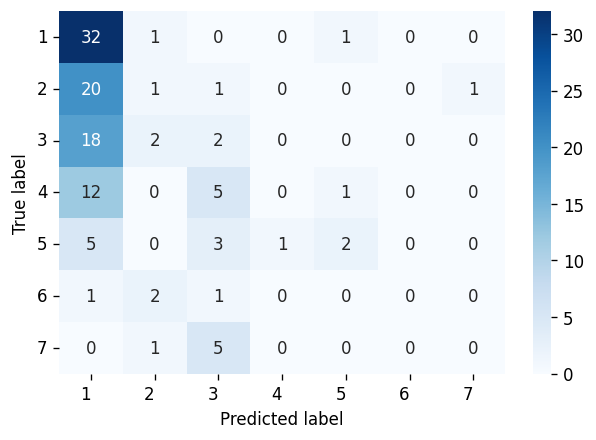

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,multilabel_confusion_matrix, roc_auc_score,confusion_matrix
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

# Vector de etiquetas
y = df[label_col_name].values

# Entrenamiento y predicción
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
svm = SVC(kernel='rbf', C=1)
svm_model = svm.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

# Obtenemos las métricas de la clasificación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred,average='macro')
roc = roc_auc_score(to_categorical(y_test, n_classes),
                    to_categorical(y_pred, n_classes),
                    multi_class="ovr")
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"ROC: {roc}")
show_confusion_matrix(cm)


## 4.2 Representaciones usando matrices y CNN

También puede hacerse la clasificación usando una red neuronal convolucional, usando representaciones matriciales de mensajes en lugar de representaciones vectoriales. 

IMPORTANTE: Necesita la tarjeta gráfica, puede correrse en colab.

In [ ]:
from sklearn.model_selection import train_test_split

X = puntaje.get_texts_representations_MAT(cols_num=5)  # Puede experimentarse con el valor de cols_num, debe ser mayor o igual que 2.
y = df[label_col_name].values

print("X:",X.shape)
print("y:",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

val_size = int(0.85*X_train.shape[0])
X_val = X_train[val_size:]
y_val = y_train[val_size:]
X_train = X_train[:val_size]
y_train = y_train[:val_size]
print("Train:",X_train.shape,y_train.shape)
print("Validation:",X_val.shape,y_val.shape)
print("Test:",X_test.shape,y_test.shape)

X: (781, 100, 5)
y: (781,)
Train: (530, 100, 5) (530,)
Validation: (94, 100, 5) (94,)
Test: (157, 100, 5) (157,)


In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

n_classes = len(keywords.labels)

print(f"Las representaciones de los mensajes son de {X_train.shape[0]}x{X_train.shape[1]}")

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', 
                            input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# entrenar el modelo:
early_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(X_train, Y_train, batch_size=16, epochs=200, validation_data=(X_val, Y_val)
            ,callbacks=[early_callback])

score = model.evaluate(X_test, Y_test)

Las representaciones de los mensajes son de 530x100


2022-02-08 14:52:13.702953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-08 14:52:13.702977: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-08 14:52:13.702993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (skywalker): /proc/driver/nvidia/version does not exist
2022-02-08 14:52:13.703584: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
34/34 [==============================] - 0s 7ms/step - loss: 1.7992 - accuracy: 0.2943 - val_loss: 1.6793 - val_accuracy: 0.2979
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 1.6528 - accuracy: 0.3170 - val_loss: 1.6353 - val_accuracy: 0.3511
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 1.5967 - accuracy: 0.3358 - val_loss: 1.6038 - val_accuracy: 0.2979
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 1.5347 - accuracy: 0.4094 - val_loss: 1.5843 - val_accuracy: 0.2872
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 1.4801 - accuracy: 0.4132 - val_loss: 1.6066 - val_accuracy: 0.3085
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 1.4250 - accuracy: 0.4396 - val_loss: 1.5727 - val_accuracy: 0.3191
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 1.3541 - accuracy: 0.4679 - val_loss: 1.5896 - val_accuracy: 0.3085
Epoch 8/200
3

Graficamos las curvas de entrenamiento

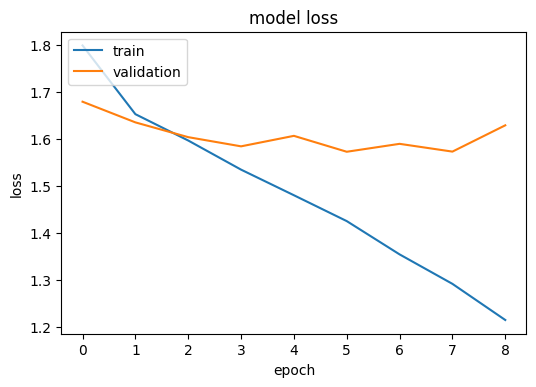

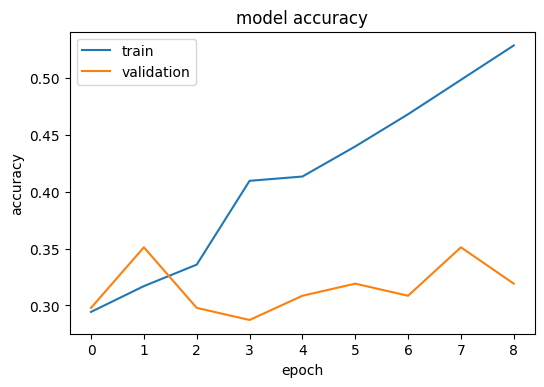

In [ ]:
plt.figure(dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(dpi=100)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Test loss: 1.801
Test accuracy: 30.57%
ROC: 0.6219640727462517
Accuracy: 0.3057324840764331
Recall: 0.20743355481727574


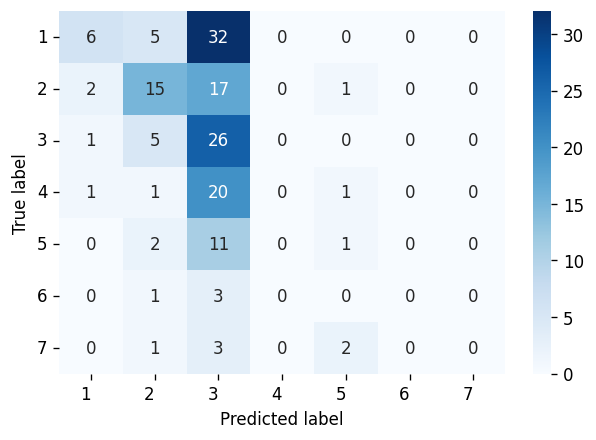

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from tensorflow.keras.utils import to_categorical

print (f"Test loss: {round(score[0],3)}")
print (f"Test accuracy: {round(score[1]*100,2)}%")

Y_pred = model.predict(X_test)

roc = roc_auc_score(Y_test,Y_pred,multi_class="ovr")
accuracy = accuracy_score(np.argmax(Y_test,axis=1),np.argmax(Y_pred,axis=1))
recall = recall_score(np.argmax(Y_test,axis=1),np.argmax(Y_pred,axis=1),average='macro')
cm = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(Y_pred,axis=1))

print(f"ROC: {roc}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
show_confusion_matrix(cm)